In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
%matplotlib inline
from tools.Forward import ForwardFlight, Plots, TailRotor

In [2]:
b = 3 ; c = 0.15
omega_air = 1050*np.pi/30 # forward omega
omega_climb = 1150*np.pi/30
omega_water = 25*np.pi/30
total_vol = 0.01     ; total_mass = 35 # kg
W = total_mass*9.8
a = 2*np.pi ; c_d = 0.1
R = 0.9
R_co = 0.3

A = np.pi*(R**2)
ro = 1.225

def rd(val):
    return round(val, 3)
def deg(val):
    return rd(val*180/np.pi)
def rad(val):
    return rd(val*np.pi/180)
pitch_forward = (rad(14), rad(2), rad(-7.8))
pitch_climb = (rad(13), rad(4), rad(-6))
linear_twist = -0.05
forward_vel_air = 100 * 5/18 # m/s
forward_vel_water = 0.5

climb_vel_air = 3
climb_vel_water = 0.5
rotor = ForwardFlight(pitch=pitch_forward, pitch_climb = pitch_climb, twist=linear_twist, 
                      forward_vel=forward_vel_air, climb_vel= climb_vel_air,
                      no_of_blades=b,chord =c, omega_forward=omega_air, omega_climb=omega_climb,
                      lift_slope=a,drag_coeff=c_d,radius=R, root_cutouts=R_co, mass=total_mass
                      )

In [3]:
print('Roll:', rd(rotor.RollMomentHub()) , ' Pitch:',  rd(rotor.PitchMomentHub()))
print(deg(rotor.beta_0))

Roll: 0.416  Pitch: 0.532
1.638


TAIL ROTOR

In [4]:
R_tail = 0.3
R_co_tail = 0.05
c_tail = 0.08
b_tail = 4
omega_tail = 2000*np.pi/30
pitch_tail = rad(8)
d_tail_shaft = 1.3*(R + R_tail) # just so it's far from the shaft that tail blades and rotor blades dont' clash
print('Length of the helicopter is:', R+ d_tail_shaft+R_tail)
print('Distance btw (hub, tail)blade tips',rd(d_tail_shaft-R-R_tail))
# I just had a revelation. So I am supposed to design tail rotor for my assignment. 
# Now I realised tail rotor is only used to counter Torque the the torque produced by the drag of the blades. 
# But for some reason I assumed Tail rotor takes care of Roll Moment and Pitch Moment. 
# But noo I have to change my pitch angles such that roll, pitch moments are zero tail rotor is not gonna help me in doing that.

Length of the helicopter is: 2.76
Distance btw (hub, tail)blade tips 0.36


In [5]:
# I am assuming tail rotor axis is alligned with body, so there is no vel in z direction on rotor.
# just Have to resolve forward_vel to see if it's in the Vinfi for rotor or not.
# We are gonna use the azimuth angle like before.
tail = TailRotor(pitch_angle=pitch_tail, no_of_blades=b_tail, chord=c_tail,
                      angular_vel=omega_tail, lift_slope=a,
                      radius=R_tail, root_cutouts=R_co_tail, forward_vel=forward_vel_air
                      )

In [6]:
tail_tip = omega_tail*R_tail
tip = omega_air*R
print('Tip Velocities',rd(tip), rd(tail_tip))
# I read that that the tip velocities are made nearly equal.

Tip Velocities 98.96 62.832


In [7]:
rd(tail.T()), rd(tail.T()*d_tail_shaft)

(89.502, 139.622)

In [8]:
rd(rotor.Torque() + rotor.Torque_i())
# Clearly the values are nearly equal i.e Tail is helping in cancling Torque produced by hub

119.5

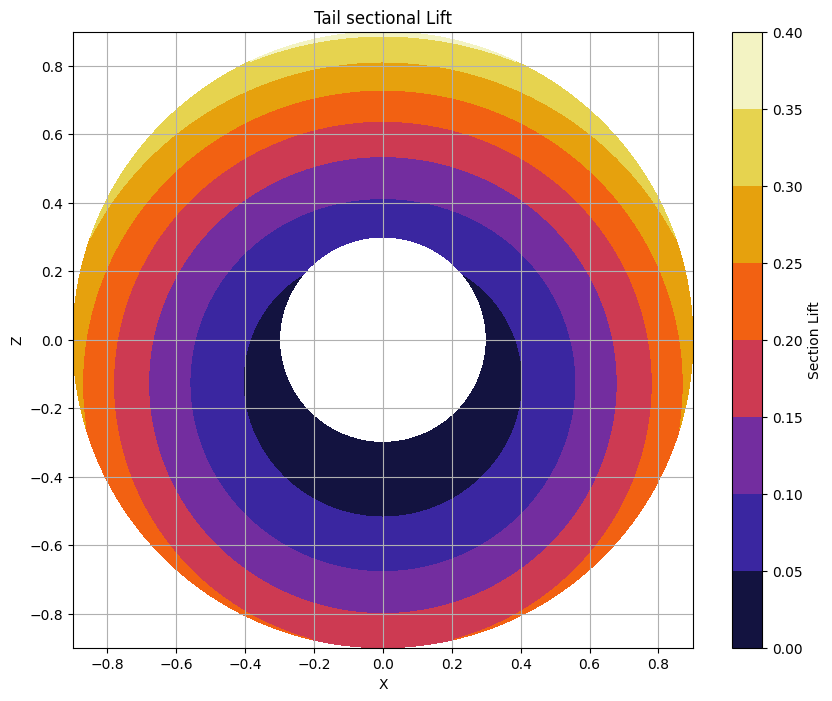

In [9]:
# Define the range of azimuthal angles and radii
azimuth_range = np.linspace(0, 2 * np.pi, 360)  ; radius_range = np.linspace(R_co, R, 60)  
dsi = azimuth_range[1] - azimuth_range[0]; dr = radius_range[1] - radius_range[0]
azimuth, radius = np.meshgrid(azimuth_range, radius_range)
lift_contour = np.copy(azimuth) ; x = np.copy(azimuth); z = np.copy(azimuth)
for i in range(60):
    for j in range(360):
        lift_contour[i][j] = tail.dL(azimuth[i][j], radius[i][j])*dsi*dr  # Replace with your actual function
        x[i][j] = radius[i][j] * np.cos(azimuth[i][j])
        z[i][j] = radius[i][j] * np.sin(azimuth[i][j])
        # I wanted to represent it in the body frame x, y axis
plt.figure(figsize=(10, 8))
contour = plt.contourf(x, z, lift_contour, cmap='CMRmap')  # Adjust the colormap as needed
plt.colorbar(contour, label='Section Lift')  # Add a colorbar
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Tail sectional Lift')
# plt.gca().set_aspect('equal')  
plt.grid(True)
plt.show()